In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
pd.__version__

# Style 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df_labels = pd.read_csv('labels.txt',sep='\n', delimiter=',', header=None )

# Function to remove dublicates from labels.

In [3]:
def uniquify(df_columns):
    df_columns = df_columns.T.iloc[0,:]
    seen = list()

    for item in df_columns:
        fudge = 'hand'
        newitem = item
        
        if newitem in seen:
            newitem = "{}_{}".format(item, fudge)

        seen.append(newitem)
    return seen
        
label_list = uniquify(df_labels)

In [4]:
df = pd.read_csv('data.txt', header=None, names=label_list, na_values = 'N/A')#, set_flags(allows_duplicate_labels=False))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [6]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,.0f
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,.0f
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,.0f
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,.0f
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,.0f


# Changing the label col from object to numbers.

In [7]:
df.iloc[:,-1].unique()
# array(['\x01.0f', '\x03.0f', '\x02.0f', '\x04.0f'], dtype=object)

for index, rows in df.iterrows():
    if df.loc[index, 'Activity'] == '\x01.0f':
        df.loc[index, 'Activity'] = 1
    elif df.loc[index, 'Activity'] == '\x02.0f':
        df.loc[index, 'Activity'] = 2
    elif df.loc[index, 'Activity'] == '\x03.0f':
        df.loc[index, 'Activity'] = 3
    elif df.loc[index, 'Activity'] == '\x04.0f':
        df.loc[index, 'Activity'] = 4

# Checking for NA

In [8]:
for col in range(df.shape[1]):
    # YOUR CODE HERE
    n_miss = df.isnull().sum(axis=0)
   # print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))
# No NA in dataset.

* Do we have to normalize all data?

# Summary statistics: 

* The first column correspond to the index of the subject. 
* The next 174 attributes are statistics extracted from the ECG signal. 
* The next 151 attributes are features extracted from the TEB signal. 
* The next 104 attributes come from the EDA measured in the arm.
* The next 104 ones from the EDA in the hand. 
* The last attribute is the pattern class, that is, the corresponding activity: 1-neutral, 2-emotional, 3-mental and 4-physical.

Idear:
 * Group by subject
 * Group by Activity 
 * https://www.youtube.com/watch?v=BJ-FIGzKEaA
 * https://www.youtube.com/watch?v=lUI6VMj43PE&ab_channel=KGPTalkie
 

In [9]:
df.groupby(['Subject index (1-40)', 'Activity']).count().iloc[1]

ECG_original_mean                               28
ECG_original_std                                28
ECG_original_trimmean25                         28
ECG_original_median                             28
ECG_original_skewness                           28
                                                ..
EDA_Functionals_power_Filt2prctile75_hand       28
EDA_Functionals_power_Filt2geomean(abs)_hand    28
EDA_Functionals_power_Filt2harmmean_hand        28
EDA_Functionals_power_Filt2mad_hand             28
EDA_Functionals_power_Filt2baseline_hand        28
Name: (1, 2), Length: 533, dtype: int64

ECG_original_mean  ECG_original_std  \
Subject index (1-40) Activity                                        
1                    1                        28                28   
                     2                        28                28   
                     3                        28                28   
                     4                        28                28   
2                    1                        28                28   
...                                          ...               ...   
39                   4                        28                28   
40                   1                        28                28   
                     2                        28                28   
                     3                        28                28   
                     4                        28                28   

                               ECG_original_trimmean25  ECG_original_median  \
Subject index (1-40) Activity                                                 
1                    1                              28                   28   
                     2                              28                   28   
                     3                              28                   28   
                     4                              28                   28   
2                    1                              28                   28   
...                                                ...                  ...   
39                   4                              28                   28   
40                   1                              28                   28   
                     2                              28                   28   
                     3                              28                   28   
                     4                              28                   28   

                               ECG_original_skewness  ECG_original_kurtosis  \
Subject index (1-40) Activity                                                 
1                    1                            28                     28   
                     2                            28                     28   
                     3                            28                     28   
                     4                            28                     28   
2                    1                            28                     28   
...                                              ...                    ...   
39                   4                            28                     28   
40                   1                            28                     28   
                     2                            28                     28   
                     3                            28                     28   
                     4                            28                     28   

                               ECG_original_max  ECG_original_min  \
Subject index (1-40) Activity                                       
1                    1                       28                28   
                     2                       28                28   
                     3                       28                28   
                     4                       28                28   
2                    1                       28                28   
...                                         ...               ...   
39                   4                       28                28   
40                   1                       28                28   
                     2                       28                28   
                     3                       28                28   
                     4                       28                28   

                               ECG_original_prctile25  ECG_original_prctile75  \
Subject index (1-40) Activity                                                   
1   

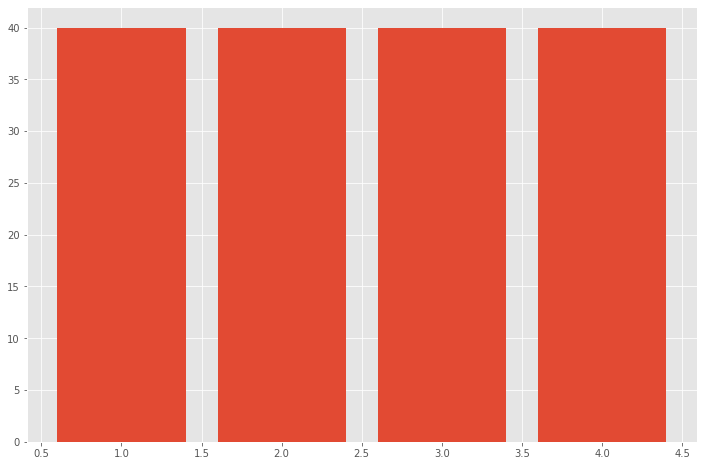

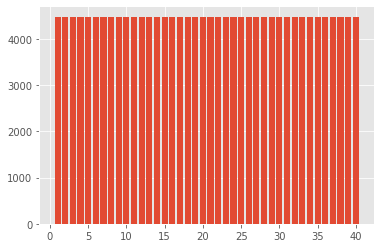

In [10]:
# plt.hist(df.iloc[:,-1], bins=1)
# plt.show()
# plt.hist(df['Subject index (1-40)'], bins=1)
# plt.show()

num_in_group = df.groupby(['Subject index (1-40)', 'Activity']).count()
display(num_in_group)
plt.figure(figsize=(12,8))
plt.bar(df['Activity'], df['Subject index (1-40)'] )
plt.show()
plt.bar(df['Subject index (1-40)'], df['Activity'].count() )
plt.show()
# There is 28 obs for each activity for each person. There are 40 persons, 28*40 = 1120 rows in each Activity.

In [11]:
mean_list = list([col for col in df.columns if "mean" in col])
median_list = list([col for col in df.columns if "median" in col])

# Visualization:

In [12]:
df_dummy = pd.get_dummies(df, columns=["Activity"])

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:,1:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [15]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)


In [16]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train_scaled,y_train)

C:\Users\matze\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 99 113 253 267] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\matze\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

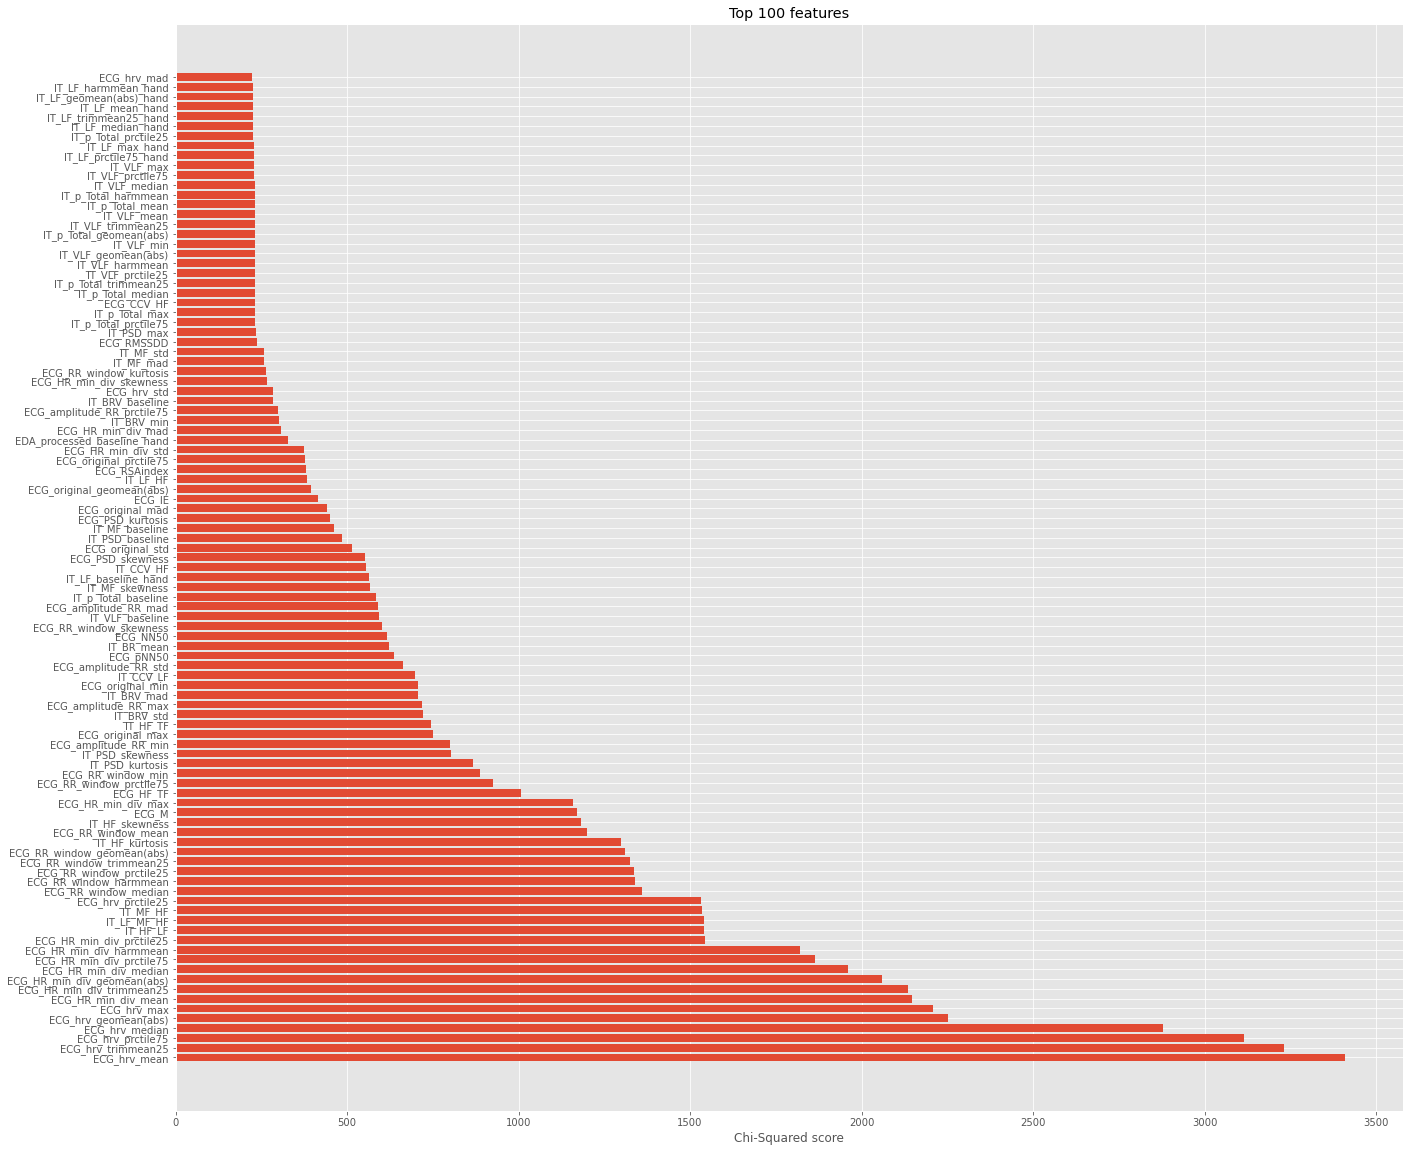

In [18]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

top_100 = featureScores.sort_values('Score', ascending=False)

good_score = top_100.iloc[0:101,:]
plt.figure(figsize= ( 22 , 20))
plt.barh(good_score['Specs'], good_score['Score'])
#plt.xticks(rotation=90)
plt.xlabel('Chi-Squared score')
plt.title('Top 100 features')
plt.show()

# Feature Importance

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train_scaled,y_train)

ExtraTreesClassifier()

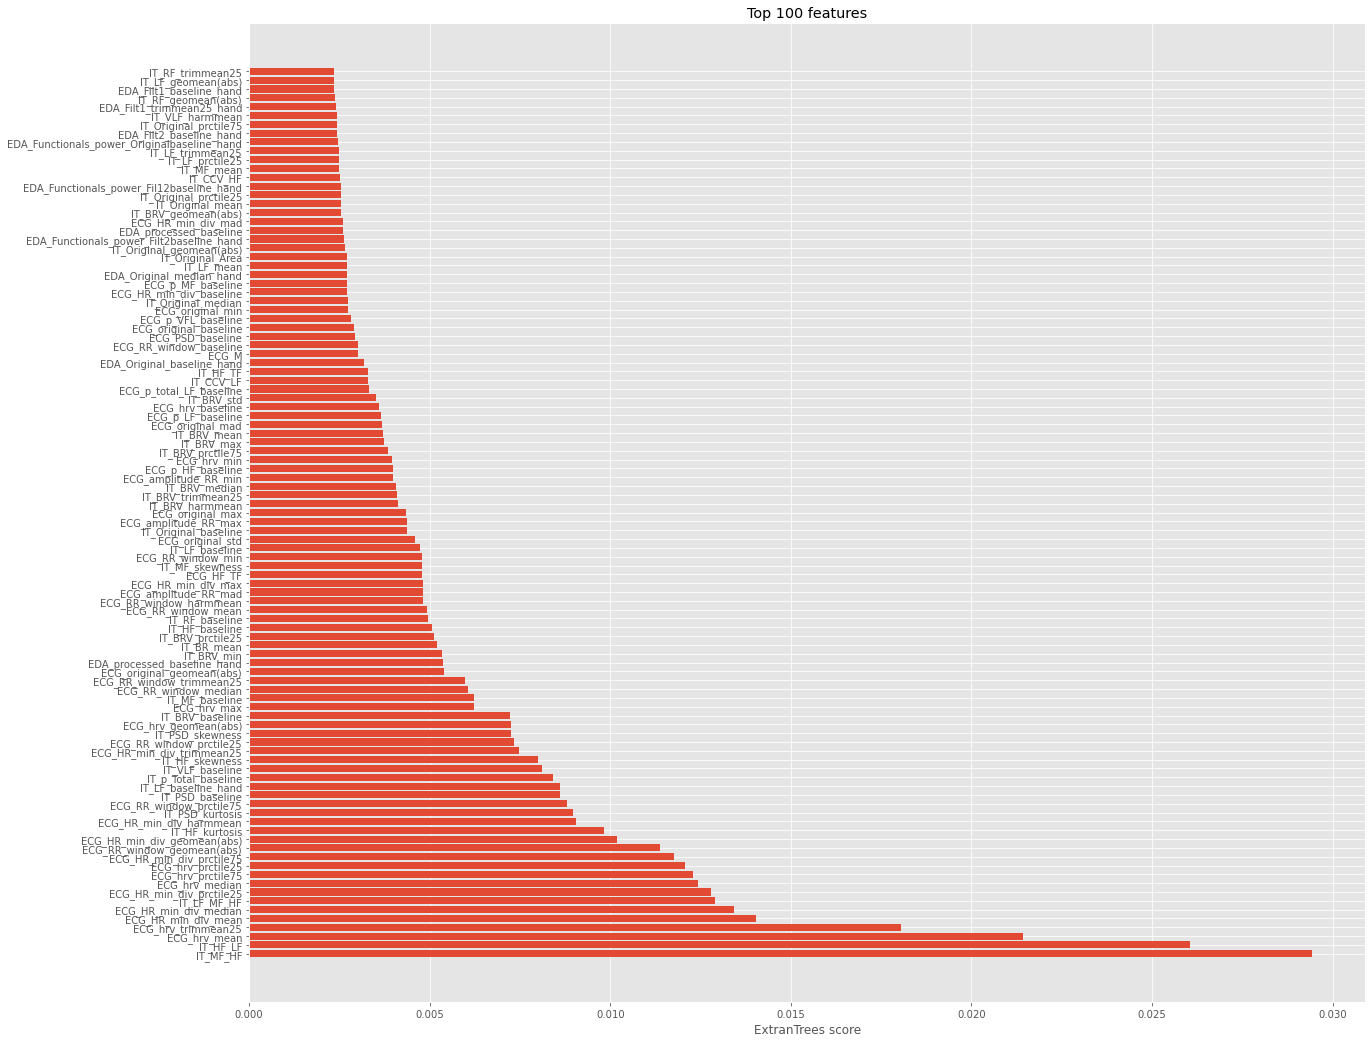

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)#use inbuilt class feature_importances of tree based classifiers
feat_importances_100 = feat_importances.sort_values(ascending=False).iloc[0:101]

plt.figure(figsize=(20,18))
plt.barh(feat_importances_100.index, feat_importances_100)
plt.xlabel('ExtranTrees score')
plt.title('Top 100 features')
plt.show()

# Correlation matrix

In [21]:
corrMatrix = np.corrcoef(X_train_scaled)
# top_coor_100 = corrMatrix
display(corrMatrix.shape)

(3360, 3360)

In [22]:
# Filter it somehow to get top correlatons. HOW??

X_ts = pd.DataFrame(data=X_train_scaled, index=None,columns=None)
# corrmat = X_ts.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(40,40))
# #plot heat map
# sns.heatmap(X_ts[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0.5, 1.0, 'Number of each Corelation')

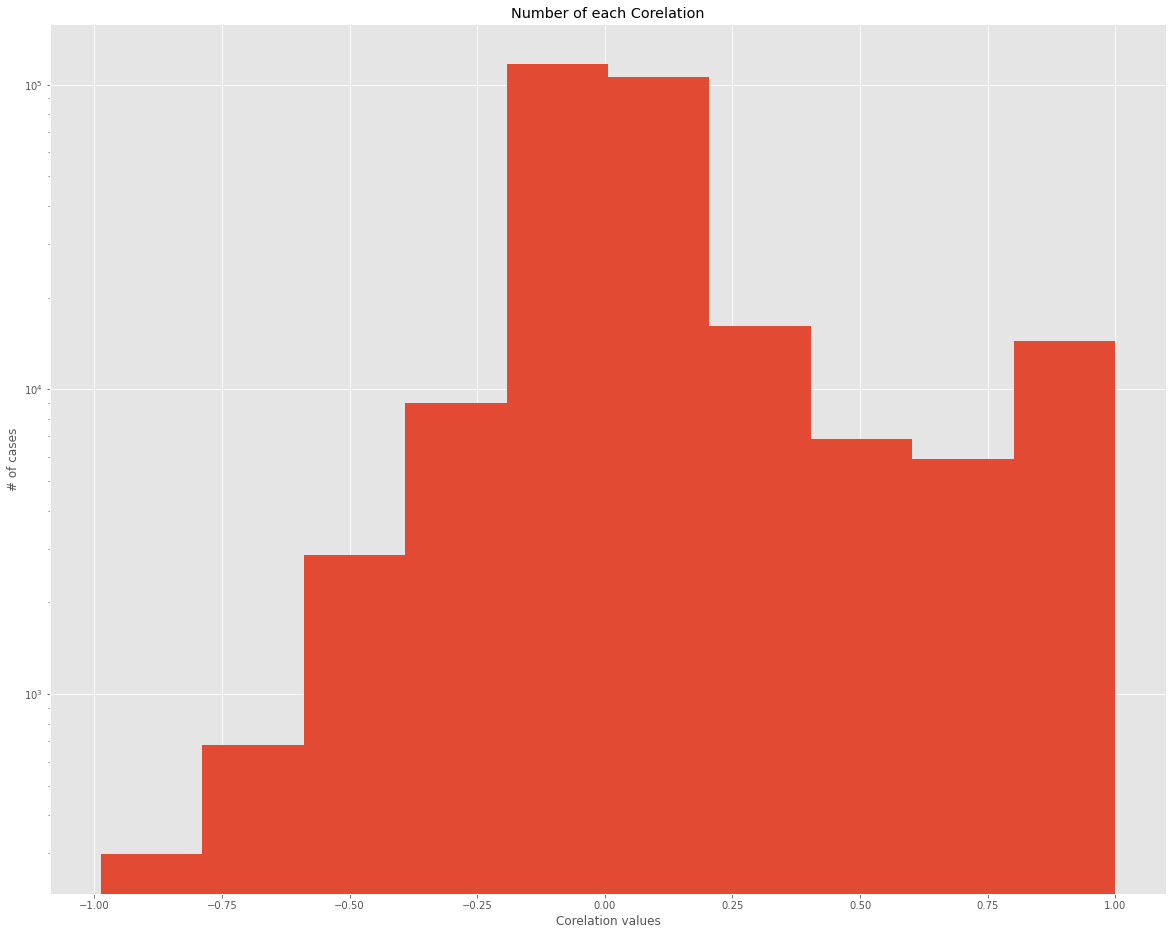

In [23]:
corr_val=0.01
X_ts_2 = X_ts.corr().unstack().reset_index()
X_ts_2 = X_ts_2.loc[X_ts_2['level_0'] != X_ts_2['level_1']].sort_values(by=0, ascending=False)

X_ts_2.hist(0, log=True, figsize = (20,16))
plt.xlabel("Corelation values")
plt.ylabel("# of cases")
plt.title("Number of each Corelation")


In [24]:
num_cor = X_ts_2.iloc[:,2].value_counts()
display(num_cor.shape)
#rg = np.arange(-1,1,0.01)

# plt.bar(x=X_ts_2.iloc[:,2].value_counts().index, y=X_ts_2.iloc[:,2].value_counts())
# plt.show()


(133390,)

# PCA and Clustering:


In [25]:
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

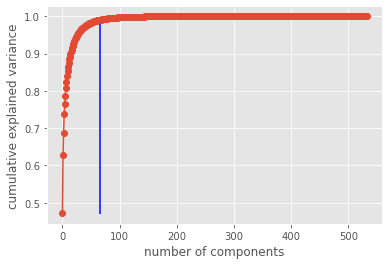

In [42]:
# Chosing number of componentes
pca_num = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca_num.explained_variance_ratio_), linestyle='-', marker='o',)
plt.vlines(ymax=0.99, ymin=0.47, x=66, color='b')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

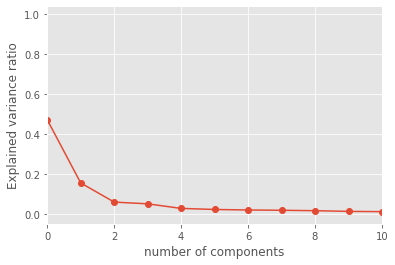

In [41]:
plt.plot(pca_num.explained_variance_ratio_, linestyle='-', marker='o')
plt.vlines(ymax=0.99, ymin=0.47, x=66, color='b')
plt.xlim(0,10)
plt.xlabel('number of components')
plt.ylabel('Explained variance ratio')

Jeg vælger at gå med 99% af variance forklaret. 

In [89]:
pca = PCA(n_components=0.99, whiten=True)
pca_transformed = pca.fit_transform(scaled_for_pca)
print(pca_transformed.shape)
print('Explained variation per principal component: {}'.format(np.cumsum(pca.explained_variance_ratio_)))
feat_cols = ['feature'+str(i) for i in range(pca_transformed.shape[1])]
principalDf = pd.DataFrame(data = pca_transformed, columns=feat_cols)
principalDf['y'] = y_train
print(principalDf.shape)

(4480, 64)
Explained variation per principal component: [0.47342613 0.63070882 0.69117602 0.74082111 0.76862403 0.79072475
 0.8103223  0.82872534 0.84465772 0.85735665 0.86879347 0.87897803
 0.8885951  0.89617369 0.90311395 0.90920011 0.91472987 0.91997317
 0.92458381 0.92897595 0.93293441 0.9364199  0.93983414 0.94289584
 0.94590818 0.94869301 0.9513     0.95372773 0.95610678 0.95826504
 0.96035517 0.96235224 0.96422895 0.96587352 0.96743878 0.96895164
 0.97032138 0.9716367  0.97285241 0.9740027  0.97512233 0.976181
 0.97722225 0.97819932 0.979148   0.98002513 0.98082243 0.9815509
 0.98226123 0.98295214 0.98362335 0.98426647 0.98488248 0.98545913
 0.98601294 0.98654641 0.98706925 0.98754982 0.98801151 0.98846666
 0.98889702 0.98929376 0.989672   0.9900472 ]
(4480, 65)


In [ ]:
pca.

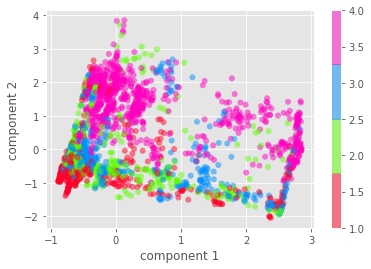

In [28]:
import matplotlib.cm
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 4))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.003s...
[t-SNE] Computed neighbors for 3360 samples in 0.563s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 0.444647
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.292290
[t-SNE] KL divergence after 5000 iterations: 0.565181


<AxesSubplot:>

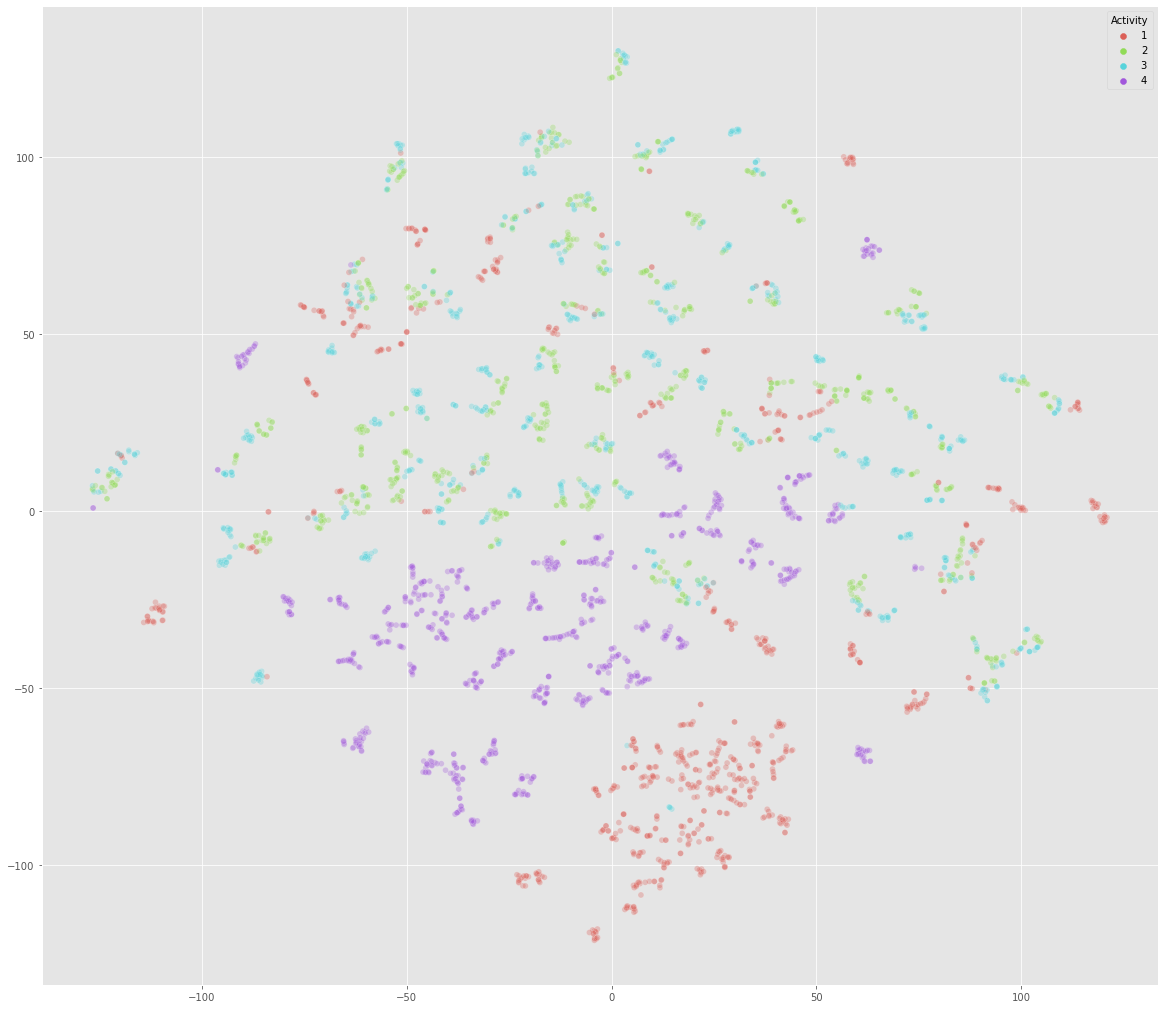

In [29]:
# Forsøg med T-SNE:
from sklearn.manifold import TSNE 


n_sne = 7000

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=5000, learning_rate=10)
tsne_results = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(20,18))

sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_train,
    palette=sns.color_palette("hls", 4),
    legend="full",
    alpha=0.3
)

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

y_train=y_train.astype('int')


Cs = [1, 10, 20, 50]
solvers=['newton-cg', 'lbfgs', 'sag', 'saga']
penaltys=['l1', 'l2']

param_grid_lr = dict(C=Cs, solver=solvers, penalty=penaltys)

grid = GridSearchCV(LogisticRegression(multi_class='multinomial',max_iter=10000), param_grid=param_grid_lr,
                    cv=3, return_train_score=True, verbose=True) 

lr=grid.fit(X_train, y_train.values.ravel())


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

NameError: name 'LogisticRegression' is not defined

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

Cs = [1, 10, 20, 50]
solvers=['newton-cg', 'lbfgs', 'sag', 'saga']
penaltys=['l1', 'l2']

param_grid_lr = dict(C=Cs, solver=solvers, penalty=penaltys)

grid = GridSearchCV(LogisticRegression(multi_class='multinomial',max_iter=10000, random_state=42), param_grid=param_grid_lr,
                    cv=3, return_train_score=True, verbose=True) 

Scores = []
lr_pipe = Pipeline([('scl', MinMaxScaler()),
                    ('clf', grid)])
lr_pipe.fit(X_train, y_train)

pca_lr_pipe = Pipeline([('scl', MinMaxScaler()),
                    ('pca', PCA(n_components=0.99)),
                    ('clf', grid)])

pca_lr_pipe.fit(X_train, y_train)

anova_lr_pipe = Pipeline([('scl', MinMaxScaler()),
                    ('anova', SelectKBest(f_classif, k=40)),
                    ('clf', grid)])

anova_lr_pipe.fit(X_train, y_train)


print('Logistic Regression Mean score: {}'.format(cross_val_score(estimator=lr_pipe, 
                                                                  X=X_train, y= y_train,
                                                                  cv=25, n_jobs = -1).mean()))
print('Logistic Regression Mean score with PCA: {}'.format(cross_val_score(estimator=pca_lr_pipe, 
                                                                  X=X_train, y= y_train,
                                                                  cv=25, n_jobs = -1).mean()))
print('Logistic Regression Mean score with Anova: {}'.format(cross_val_score(estimator=anova_lr_pipe, 
                                                                  X=X_train, y= y_train,
                                                                  cv=25, n_jobs = -1).mean()))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Logistic Regression Mean score: 0.8797656163626314
Logistic Regression Mean score with PCA: 0.8443316749585407


KeyboardInterrupt: 

# Clustering

In [70]:
X = df.iloc[:,1:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
y=y.astype('int')

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_for_pca = scaler.fit_transform(X)

pca = PCA(n_components=0.99, whiten=True)
pca_transformed = pca.fit_transform(scaled_for_pca)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_transformed, y, random_state=42)

# Anova:
anova_filter = SelectKBest(f_classif, k=40)
# learn relationship from training data
anova_filter.fit(scaled_for_pca, y.values.ravel())
# transform train input data
X_anova_filter = anova_filter.transform(scaled_for_pca)

X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(X_anova_filter, y, random_state=42)

print(X_train_scaled.shape)
print(pca_transformed.shape,X_train_pca.shape)
print(X_anova_filter.shape,X_train_anova.shape )

(3360, 533)
(4480, 64) (3360, 64)
(4480, 40) (3360, 40)


In [78]:
from sklearn.cluster import KMeans

k_means_OG = KMeans(n_clusters=4, random_state=42)
k_means_OG.fit(X_train_scaled)
label_OG = k_means_OG.fit_predict(X_test_scaled)

k_means_pca = KMeans(n_clusters=4, random_state=42)
k_means_pca.fit(X_train_pca)
label_pca = k_means_pca.fit_predict(X_test_pca)

k_means_anova = KMeans(n_clusters=4, random_state=42)
k_means_anova.fit(X_train_anova)
label_anova = k_means_anova.fit_predict(X_test_anova)

print(k_means.cluster_centers_.shape)
print(k_means.labels_.shape)
print(k_means.predict(X).shape)

(4, 533)
(3360,)
(4480,)


In [61]:
def scatter_plt(x, y, c, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    ax.scatter(x, y, c=plt.cm.tab10(c), **kwargs)

([], [])

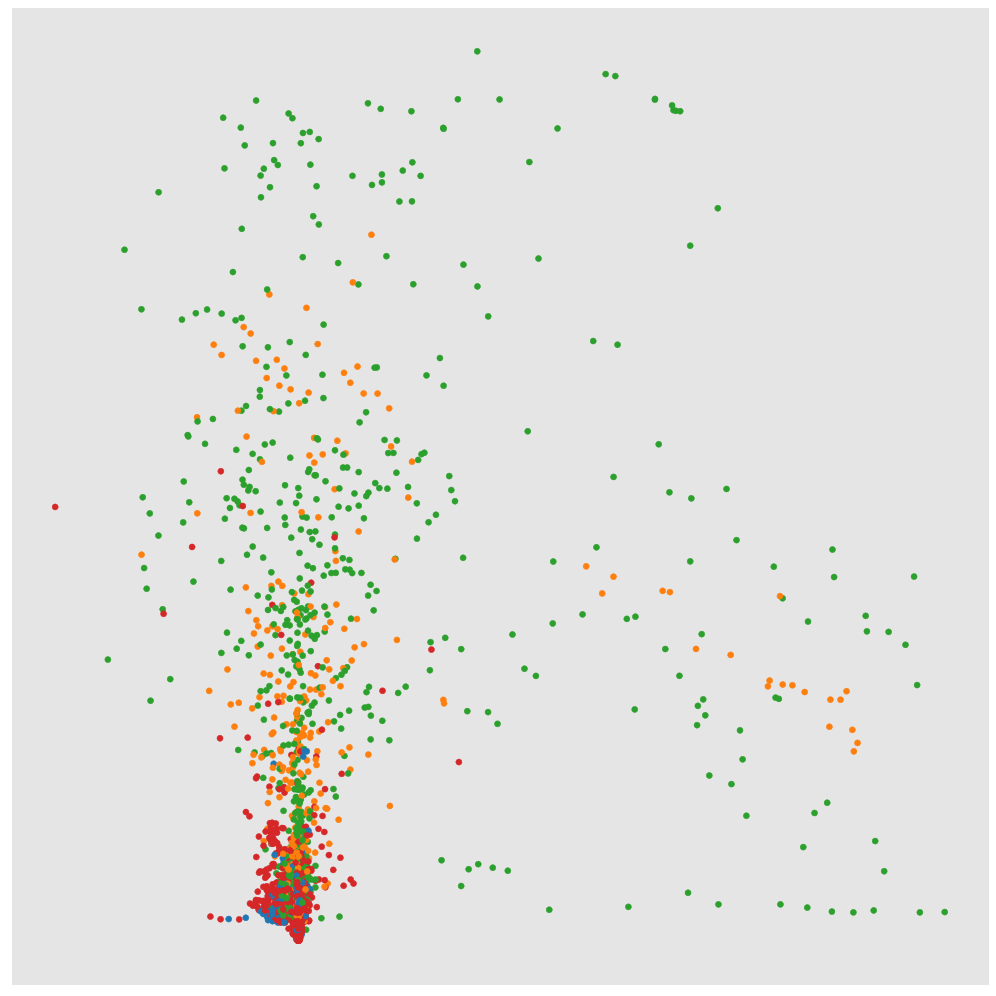

In [62]:
plt.figure(figsize=(20,18))
scatter_plt(X_train_scaled[:, 0],X_train_scaled[:, 1], c=k_means_OG.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())


([], [])

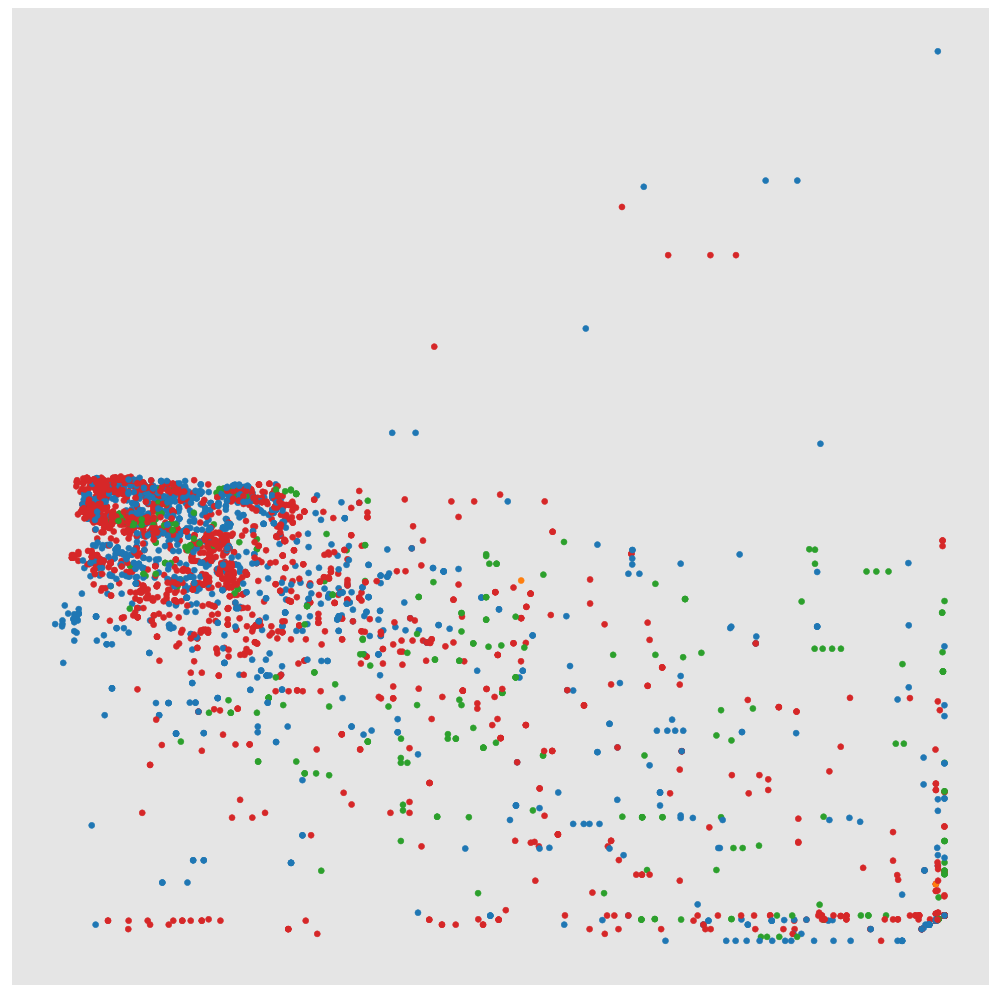

In [63]:
plt.figure(figsize=(20,18))
scatter_plt(X_train_anova[:, 0],X_train_anova[:, 1], c=k_means_pca.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

([], [])

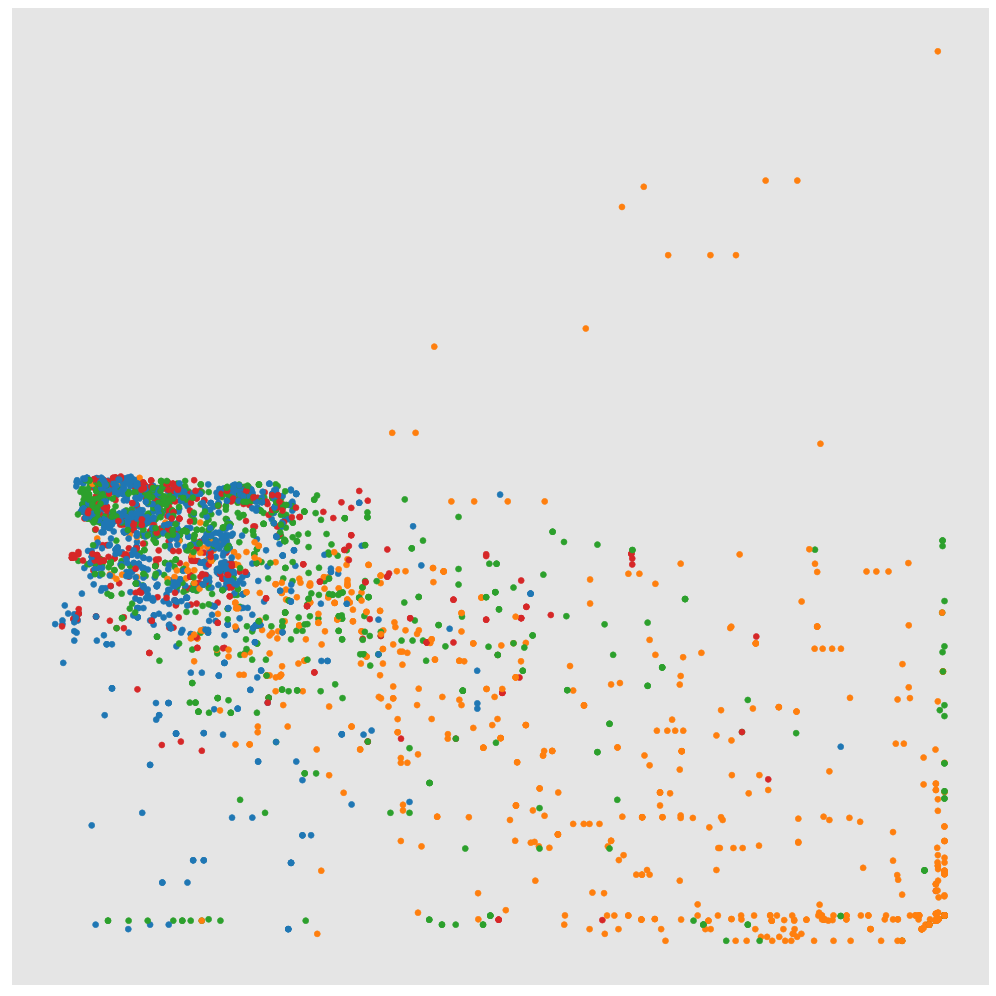

In [64]:
plt.figure(figsize=(20,18))
scatter_plt(X_train_anova[:, 0],X_train_anova[:, 1], c=k_means_anova.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

In [83]:
#Getting the Centroids
centroids = k_means_anova.cluster_centers_
u_labels = np.unique(label_anova)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_train_anova[label_anova == i , 0] , X_train_anova[label_anova == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3360 but corresponding boolean dimension is 1120

## Find elbow point (We know it should be 4)

In [ ]:
K = range(2, 8)
inertia = []

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(X_train_scaled)
    inertia.append(k_means.inertia_)

In [ ]:
plt.plot(K, inertia, '-o', color='black')
plt.xlabel('# of cluster, k', fontsize=16)
plt.ylabel('Inertia (SS distances of samples \n to their closest cluster center)', fontsize=16)
plt.xticks(K)
plt.show()

* Check out DBSCAN!

# Pipeline PCA and logistic regression

## Preliminaries

In [16]:
# Import required packages
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

## DATA

In [17]:
X = df.iloc[:,1:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Create Pipelines


In [18]:
# Create an scaler object
sc = StandardScaler()

# Create a pca object
pca = decomposition.PCA()

# Create a logistic regression object with an L2 penalty
logistic = linear_model.LogisticRegression()

# Create a pipeline of three steps. First, standardize the data.
# Second, tranform the data with PCA.
# Third, train a logistic regression on the data.
pipe = Pipeline(steps=[('sc', sc), 
                       ('pca', pca), 
                       ('logistic', logistic)])

# Create an scaler object
sc = StandardScaler()

# Create a pca object
pca = decomposition.PCA()

# Create a logistic regression object with an L2 penalty
logistic = linear_model.LogisticRegression()

# Create a pipeline of three steps. First, standardize the data.
# Second, tranform the data with PCA.
# Third, train a logistic regression on the data.
pipe = Pipeline(steps=[('sc', sc), 
                       ('pca', pca), 
                       ('logistic', logistic)])

## Create Parameter Space

In [19]:
# Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X.shape[1]+1,1))

# Create a list of values of the regularization parameter
C = np.logspace(-4, 4, 50)

# Create a list of options for the regularization penalty
penalty = ['l1', 'l2']

# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components, 
                  logistic__C=C,
                  logistic__penalty=penalty)

## Conduct Parameter Optmization With Pipeline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Create a grid search object
clf = GridSearchCV(pipe, parameters)

# Fit the grid search
clf.fit(X_train, y_train)

In [ ]:
# View The Best Parameters
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])

## Use Cross Validation To Evaluate Model

In [ ]:
# Fit the grid search using 3-Fold cross validation
cross_val_score(clf, X, y)

# Detecting Outliers

In [ ]:
from sklearn.covariance import EllipticEnvelope

EllipticEnvelope assumes the data is normally distributed and based on that assumption “draws” an ellipse around the data, classifying any observation inside the ellipse as an inlier (labeled as 1) and any observation outside the ellipse as an outlier (labeled as -1). A major limitation of this approach is the need to specify a contamination parameter which is the proportion of observations that are outliers, a value that we don’t know.



In [ ]:
# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)

# Fit detector
outlier_detector.fit(X)

# Predict outliers
outlier_detector.predict(X)